In [1]:
import pandas as pd
df = pd.read_excel('data_to_train.xlsx')

In [7]:
df_1996 = df[df['Год вспышки'] == 1996]

In [15]:
df_1996

,"Влажность почвы, балл","Мшистость, балл","Число гусениц сибирского шелкопряда на 1 дерево, шт.",% объедания кроны,Экспозиция склона,"Крутизна склона, град",П,Е,Л,Б,...,SoilMoi00_3,SoilMoi00_4,SoilMoi00_5,SoilMoi00_6,SoilMoi00_7,SoilMoi00_8,SoilMoi00_9,SoilMoi00_10,Год вспышки,Вспышка Да/Нет Эталон
539,3,1,63.5,1,0,0,7,1,1,0,...,0.322261,0.406114,0.362217,0.314472,0.280493,0.260756,0.297047,0.326945,1996,1
540,3,1,58.6,1,0,0,4,3,3,0,...,0.320508,0.403834,0.362477,0.314038,0.281091,0.261049,0.297098,0.326710,1996,1
541,3,1,3.2,0,0,0,4,2,3,0,...,0.320508,0.403834,0.362477,0.314038,0.281091,0.261049,0.297098,0.326710,1996,0
542,2,1,3.9,0,0,0,3,2,4,0,...,0.318929,0.401785,0.362748,0.313664,0.281656,0.261325,0.297149,0.326514,1996,0
543,2,0,480.7,1,0,0,8,2,0,0,...,0.317267,0.398915,0.363244,0.313291,0.282166,0.261657,0.297303,0.326260,1996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15429,2,1,0.0,0,0,0,1,0,0,5,...,0.381384,0.320263,0.285382,0.257666,0.248171,0.284418,0.298887,0.280517,1996,0
15430,3,1,0.0,0,0,0,2,1,1,1,...,0.381384,0.320263,0.285382,0.257666,0.248171,0.284418,0.298887,0.280517,1996,0
15431,3,1,0.0,0,6,10,2,1,1,1,...,0.381384,0.320263,0.285382,0.257666,0.248171,0.284418,0.298887,0.280517,1996,0
15432,2,1,0.0,0,0,0,2,0,1,0,...,0.381384,0.320263,0.285382,0.257666,0.248171,0.284418,0.298887,0.280517,1996,0


In [19]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Предположим, что у вас есть DataFrame df_1996

df_1996 = df#[df['Год вспышки'] == 1996]

# Подготовка данных
X = df_1996.drop(columns=['Вспышка Да/Нет Эталон', 'Год вспышки',
                          'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = df_1996['Вспышка Да/Нет Эталон']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение функции оценки
def evaluate(individual):
    clf = RandomForestClassifier(n_estimators=individual[0], max_depth=individual[1])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred),

# Создание объекта для оптимизации
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 1, 100)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=100, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Создание начальной популяции и запуск ГА
population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

# Получение лучшего индивидуума
best_individual = tools.selBest(population, k=1)[0]

# Обучение модели с лучшими параметрами
clf = RandomForestClassifier(n_estimators=best_individual[0], max_depth=best_individual[1])
clf.fit(X_train, y_train)

# Оценка модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	37    
2  	21    
3  	33    
4  	26    
5  	33    
6  	35    
7  	32    
8  	26    
9  	35    
10 	28    
Accuracy: 0.9935212180110139


In [17]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Предположим, что у вас есть DataFrame df_1996

# Подготовка данных
X = df_1996.drop(columns=['Вспышка Да/Нет Эталон', 'Год вспышки',
                          'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = df_1996['Вспышка Да/Нет Эталон']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение функции оценки
def evaluate(individual):
    clf = RandomForestClassifier(n_estimators=individual[0], max_depth=individual[1])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred),

# Создание объекта для оптимизации
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 1, 100)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=100, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Создание начальной популяции и запуск ГА
population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

# Получение лучшего индивидуума
best_individual = tools.selBest(population, k=1)[0]

# Обучение модели с лучшими параметрами
clf = RandomForestClassifier(n_estimators=best_individual[0], max_depth=best_individual[1])
clf.fit(X_train, y_train)

# Оценка модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	33    
2  	39    
3  	24    
4  	23    
5  	30    
6  	33    
7  	25    
8  	33    
9  	31    
10 	26    
Accuracy: 0.9799382716049383


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Предположим, что у вас есть DataFrame df_1996

# Подготовка данных
X = df_1996.drop(columns=['Вспышка Да/Нет Эталон'])
y = df_1996['Вспышка Да/Нет Эталон']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение функции оценки
def evaluate(individual):
    clf = RandomForestClassifier(n_estimators=individual[0], max_depth=individual[1])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred),

# Создание объекта для оптимизации
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 1, 100)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=100, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Создание начальной популяции и запуск ГА
population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

# Получение лучшего индивидуума
best_individual = tools.selBest(population, k=1)[0]

# Обучение модели с лучшими параметрами
clf = RandomForestClassifier(n_estimators=best_individual[0], max_depth=best_individual[1])
clf.fit(X_train, y_train)

# Оценка модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Сохранение результатов каждой популяции в файл Excel
# Создаем DataFrame для хранения результатов каждой популяции
populations_df = pd.DataFrame(columns=['Generation', 'Best_N_Estimators', 'Best_Max_Depth', 'Accuracy'])

# Заполняем DataFrame результатами каждой популяции
for i, population in enumerate(algorithms.each_populations(population)):
    best_individual = tools.selBest(population, k=1)[0]
    best_n_estimators = best_individual[0]
    best_max_depth = best_individual[1]
    accuracy = evaluate(best_individual)[0]  # Оцениваем лучший индивидуум
    populations_df.loc[i] = [i, best_n_estimators, best_max_depth, accuracy]

# Сохраняем DataFrame в файл Excel
populations_df.to_excel('populations_results.xlsx', index=False)


C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	33    
2  	27    
3  	34    
4  	36    
5  	29    
6  	31    
7  	33    
8  	28    
9  	29    
10 	29    
Accuracy: 0.9938271604938271


AttributeError: module 'deap.algorithms' has no attribute 'each_populations'

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Предположим, что у вас есть DataFrame df_1996
df_1996 = df#[df['Год вспышки'] == 1996]

# Подготовка данных
X = df_1996.drop(columns=['Вспышка Да/Нет Эталон', 'Год вспышки',
                          'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = df_1996['Вспышка Да/Нет Эталон']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение функции оценки
def evaluate(individual):
    clf = RandomForestClassifier(n_estimators=individual[0], max_depth=individual[1])
    #RandomForestClassifier(n_estimators=individual[0], max_depth=individual[1], min_samples_split=individual[2], min_samples_leaf=individual[3])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred),

# Создание объекта для оптимизации
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 1, 100)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=100, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Создание начальной популяции и запуск ГА
population = toolbox.population(n=50)
population, _ = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

# Получение лучшего индивидуума
best_individual = tools.selBest(population, k=1)[0]

# Обучение модели с лучшими параметрами
clf = RandomForestClassifier(n_estimators=best_individual[0], max_depth=best_individual[1])
clf.fit(X_train, y_train)

# Оценка модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Сохранение результатов каждой популяции в файл Excel
# Создаем DataFrame для хранения результатов каждой популяции
populations_df = pd.DataFrame(columns=['Generation', 'Best_N_Estimators', 'Best_Max_Depth', 'Accuracy'])

# Заполняем DataFrame результатами каждой популяции
for i in range(len(population)):
    best_individual = population[i]
    best_n_estimators = best_individual[0]
    best_max_depth = best_individual[1]
    accuracy = evaluate(best_individual)[0]  # Оцениваем лучший индивидуум
    populations_df.loc[i] = [i, best_n_estimators, best_max_depth, accuracy]

# Сохраняем DataFrame в файл Excel
populations_df.to_excel('populations_results.xlsx', index=False)


C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	26    
2  	27    
3  	31    
4  	31    
5  	31    
6  	31    
7  	33    
8  	39    
9  	35    
10 	37    
Accuracy: 0.9938451571104633


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics

df = pd.read_excel('data_to_train.xlsx')

# Подготовка данных
X = df.drop(columns=['Вспышка Да/Нет Эталон', 'Год вспышки',
                          'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = df['Вспышка Да/Нет Эталон']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9935212180110139


In [67]:
import pandas as pd

old_df = pd.read_excel('data.xlsx')

# Список столбцов для удаления
columns_to_drop = ['номер лесничества', 'Лесничество', 'Участковое лесничество',  
                   'П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   'Влажность почвы, балл', 'Мшистость, балл', 
                   'Возраст', 'Бонитет', 'Высота, м', 'Диаметр, см', 'Полнота', 'Запас, м3/га',
                   'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град',
                   'Год вспышки', '№ Квартала', '№ Выдела', 'Состав', 'Влажность почвы']

# Удаление столбцов из DataFrame
old_df = old_df.drop(columns=columns_to_drop)

# Подготовка данных
X = old_df.drop(columns=['Вспышка Да/Нет Эталон', '№', 'Тип леса',
                          'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = old_df['Вспышка Да/Нет Эталон']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9941690962099126


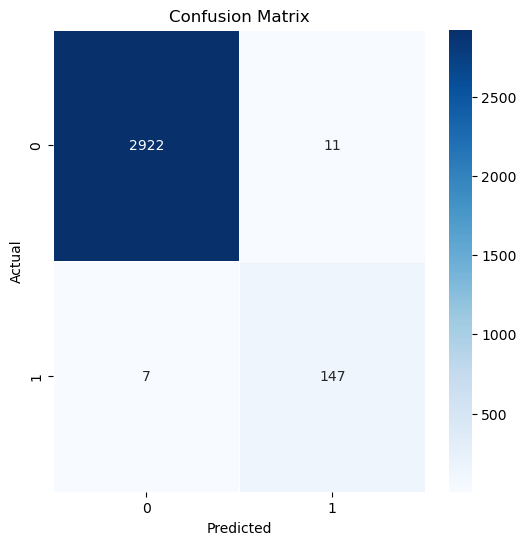

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Вычисляем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализируем матрицу ошибок с помощью тепловой карты
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [38]:
import pandas as pd

old_df = pd.read_excel('data.xlsx')

# Список столбцов для удаления
columns_to_leave = [#'П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   'Влажность почвы, балл', 'Мшистость, балл', 
                   'Возраст', 'Бонитет', 'Высота, м', 'Диаметр, см', 'Полнота', 'Запас, м3/га',
                   'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град']

# Удаление столбцов из DataFrame
old_df_ = old_df[columns_to_leave]#.drop(columns=columns_to_drop)

# Подготовка данных
X = old_df_#.drop(columns=['Вспышка Да/Нет Эталон', '№', 'Тип леса', 'Год вспышки', '№ Квартала', '№ Выдела', 'Состав',
                          #'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = old_df['Вспышка Да/Нет Эталон']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9559442824748947


In [39]:
import pandas as pd

old_df = pd.read_excel('data.xlsx')

# Список столбцов для удаления
columns_to_leave = [#'П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   #'Влажность почвы, балл', 'Мшистость, балл', 
                   'Возраст', 'Бонитет', 'Высота, м', 'Диаметр, см', 'Полнота', 'Запас, м3/га',
                   'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град']

# Удаление столбцов из DataFrame
old_df_ = old_df[columns_to_leave]#.drop(columns=columns_to_drop)

# Подготовка данных
X = old_df_#.drop(columns=['Вспышка Да/Нет Эталон', '№', 'Тип леса', 'Год вспышки', '№ Квартала', '№ Выдела', 'Состав',
                          #'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = old_df['Вспышка Да/Нет Эталон']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.953028830579851


In [40]:
import pandas as pd

old_df = pd.read_excel('data.xlsx')

# Список столбцов для удаления
columns_to_leave = [#'П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   #'Влажность почвы, балл', 'Мшистость, балл', 
                   'Возраст', 'Бонитет', 'Высота, м', 'Диаметр, см', 'Полнота', 'Запас, м3/га',
                   #'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град'
]

# Удаление столбцов из DataFrame
old_df_ = old_df[columns_to_leave]#.drop(columns=columns_to_drop)

# Подготовка данных
X = old_df_#.drop(columns=['Вспышка Да/Нет Эталон', '№', 'Тип леса', 'Год вспышки', '№ Квартала', '№ Выдела', 'Состав',
                          #'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = old_df['Вспышка Да/Нет Эталон']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9556203433754454


In [41]:
import pandas as pd

old_df = pd.read_excel('data.xlsx')

# Список столбцов для удаления
columns_to_leave = [#'П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   #'Влажность почвы, балл', 'Мшистость, балл', 
                   'Возраст', 'Высота, м', 'Диаметр, см', #'Полнота', 'Запас, м3/га',
                   #'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град'
]

# Удаление столбцов из DataFrame
old_df_ = old_df[columns_to_leave]#.drop(columns=columns_to_drop)

# Подготовка данных
X = old_df_#.drop(columns=['Вспышка Да/Нет Эталон', '№', 'Тип леса', 'Год вспышки', '№ Квартала', '№ Выдела', 'Состав',
                          #'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = old_df['Вспышка Да/Нет Эталон']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.949789439585358


In [52]:
import pandas as pd

old_df = pd.read_excel('data.xlsx')

old_df = old_df#.loc[0:1000]
# Список столбцов для удаления
columns_to_leave = [#'П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   #'Влажность почвы, балл', 'Мшистость, балл', 
                   'Возраст', #'Высота, м', #'Диаметр, см', #'Полнота', 'Запас, м3/га',
                   #'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град'
]

# Удаление столбцов из DataFrame
old_df_ = old_df[columns_to_leave]#.drop(columns=columns_to_drop)

# Подготовка данных
X = old_df_#.drop(columns=['Вспышка Да/Нет Эталон', '№', 'Тип леса', 'Год вспышки', '№ Квартала', '№ Выдела', 'Состав',
                          #'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = old_df['Вспышка Да/Нет Эталон']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9501133786848073


In [51]:
import pandas as pd

old_df = pd.read_excel('data.xlsx')

old_df = old_df.loc[0:1000]
# Список столбцов для удаления
columns_to_leave = [#'П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   #'Влажность почвы, балл', 'Мшистость, балл', 
                   'Возраст', #'Высота, м', #'Диаметр, см', #'Полнота', 'Запас, м3/га',
                   #'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град'
]

# Удаление столбцов из DataFrame
old_df_ = old_df[columns_to_leave]#.drop(columns=columns_to_drop)

# Подготовка данных
X = old_df_#.drop(columns=['Вспышка Да/Нет Эталон', '№', 'Тип леса', 'Год вспышки', '№ Квартала', '№ Выдела', 'Состав',
                          #'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = old_df['Вспышка Да/Нет Эталон']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6865671641791045


In [64]:
import pandas as pd

old_df = pd.read_excel('data.xlsx')

old_df = old_df.loc[0:5000]

columns_to_leave = ['П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   'Влажность почвы, балл', 'Мшистость, балл', 
                   'Возраст', 'Высота, м', 'Диаметр, см', 'Полнота', 'Запас, м3/га',
                   'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град'
]

# Удаление столбцов из DataFrame
old_df_ = old_df[columns_to_leave]#.drop(columns=columns_to_drop)

# Подготовка данных
X = old_df_#.drop(columns=['Вспышка Да/Нет Эталон', '№', 'Тип леса', 'Год вспышки', '№ Квартала', '№ Выдела', 'Состав',
                          #'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = old_df['Вспышка Да/Нет Эталон']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.919080919080919


In [65]:
import pandas as pd

old_df = pd.read_excel('data.xlsx')
old_df_add = old_df.loc[5000:old_df.shape[0]]

# Подготовка данных
X_add = old_df_add[columns_to_leave]#old_df_add['Возраст']
y_add = old_df_add['Вспышка Да/Нет Эталон']


# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_add)

# Оцениваем качество модели
accuracy = accuracy_score(y_add, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.884895533831704


In [66]:
# Вычисляем матрицу ошибок
conf_matrix = confusion_matrix(y_add, y_pred)

# Выводим матрицу ошибок на экран
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[9233 1201]
 [   0    0]]


In [3]:
import pandas as pd

old_df = pd.read_excel('data.xlsx')

old_df = old_df.loc[0:10000]
# Список столбцов для удаления
columns_to_leave = [#'П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   #'Влажность почвы, балл', 'Мшистость, балл', 
                   'Возраст', #'Высота, м', #'Диаметр, см', #'Полнота', 'Запас, м3/га',
                   #'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град'
]

# Удаление столбцов из DataFrame
old_df_ = old_df[columns_to_leave]#.drop(columns=columns_to_drop)

# Подготовка данных
X = old_df_#.drop(columns=['Вспышка Да/Нет Эталон', '№', 'Тип леса', 'Год вспышки', '№ Квартала', '№ Выдела', 'Состав',
                          #'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = old_df['Вспышка Да/Нет Эталон']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: name 'train_test_split' is not defined

In [4]:
# Список столбцов для удаления
columns_to_leave = [#'П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   'Влажность почвы, балл', 'Мшистость, балл', 'Вспышка Да/Нет Эталон',
                   'Возраст', 'Высота, м', 'Диаметр, см', 'Полнота', 'Запас, м3/га',
                   'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град'
]

# Удаление столбцов из DataFrame
old_df__ = old_df[columns_to_leave]#.drop(columns=columns_to_drop)

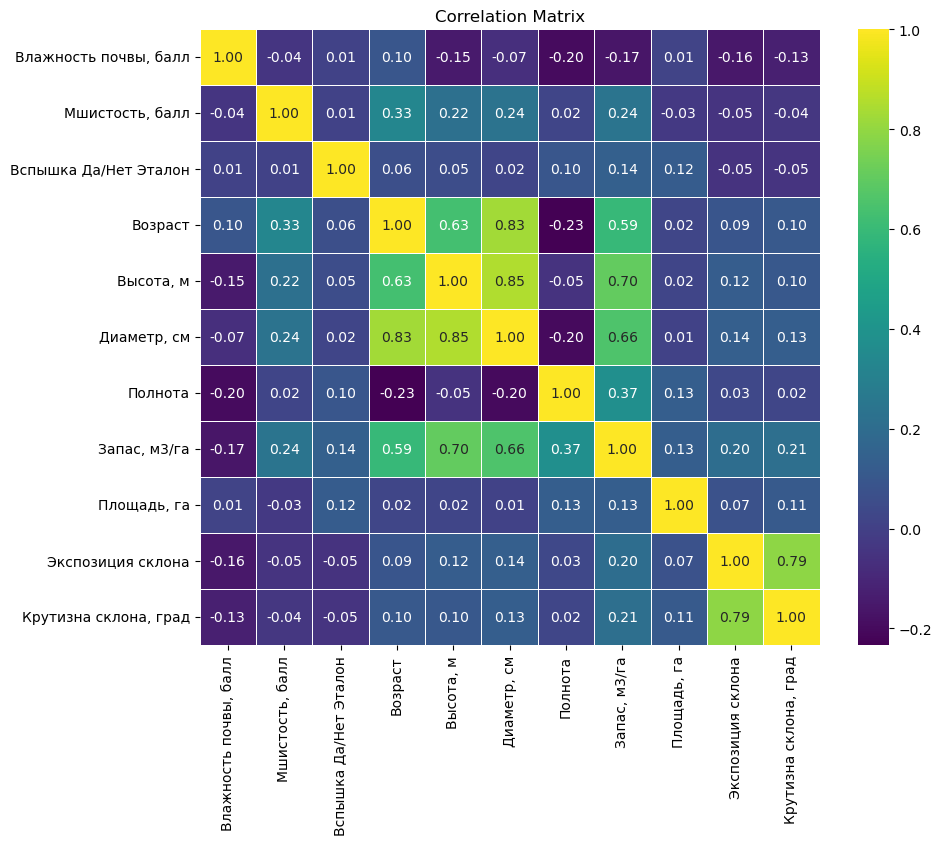

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# Вычисляем матрицу корреляции для выбранных признаков
corr_matrix = old_df__.corr()

# Визуализируем матрицу корреляции с помощью seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


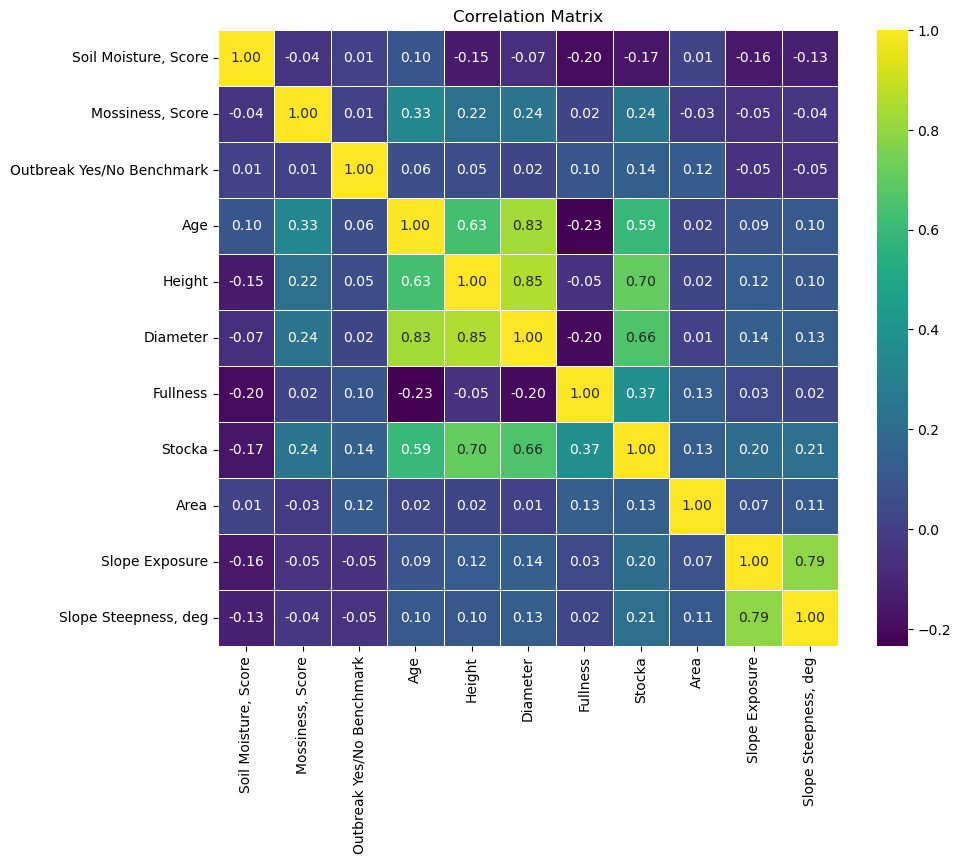

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем матрицу корреляции для выбранных признаков
corr_matrix = old_df__.corr()

# New labels
new_labels = [
    'Soil Moisture, Score', 'Mossiness, Score', 'Outbreak Yes/No Benchmark',
    'Age', 'Height', 'Diameter', 'Fullness', 'Stocka',
    'Area', 'Slope Exposure', 'Slope Steepness, deg'
]

# Визуализируем матрицу корреляции с помощью seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt=".2f", linewidths=.5,
            xticklabels=new_labels, yticklabels=new_labels)
plt.title('Correlation Matrix')
plt.savefig('corr.pdf')
plt.show()



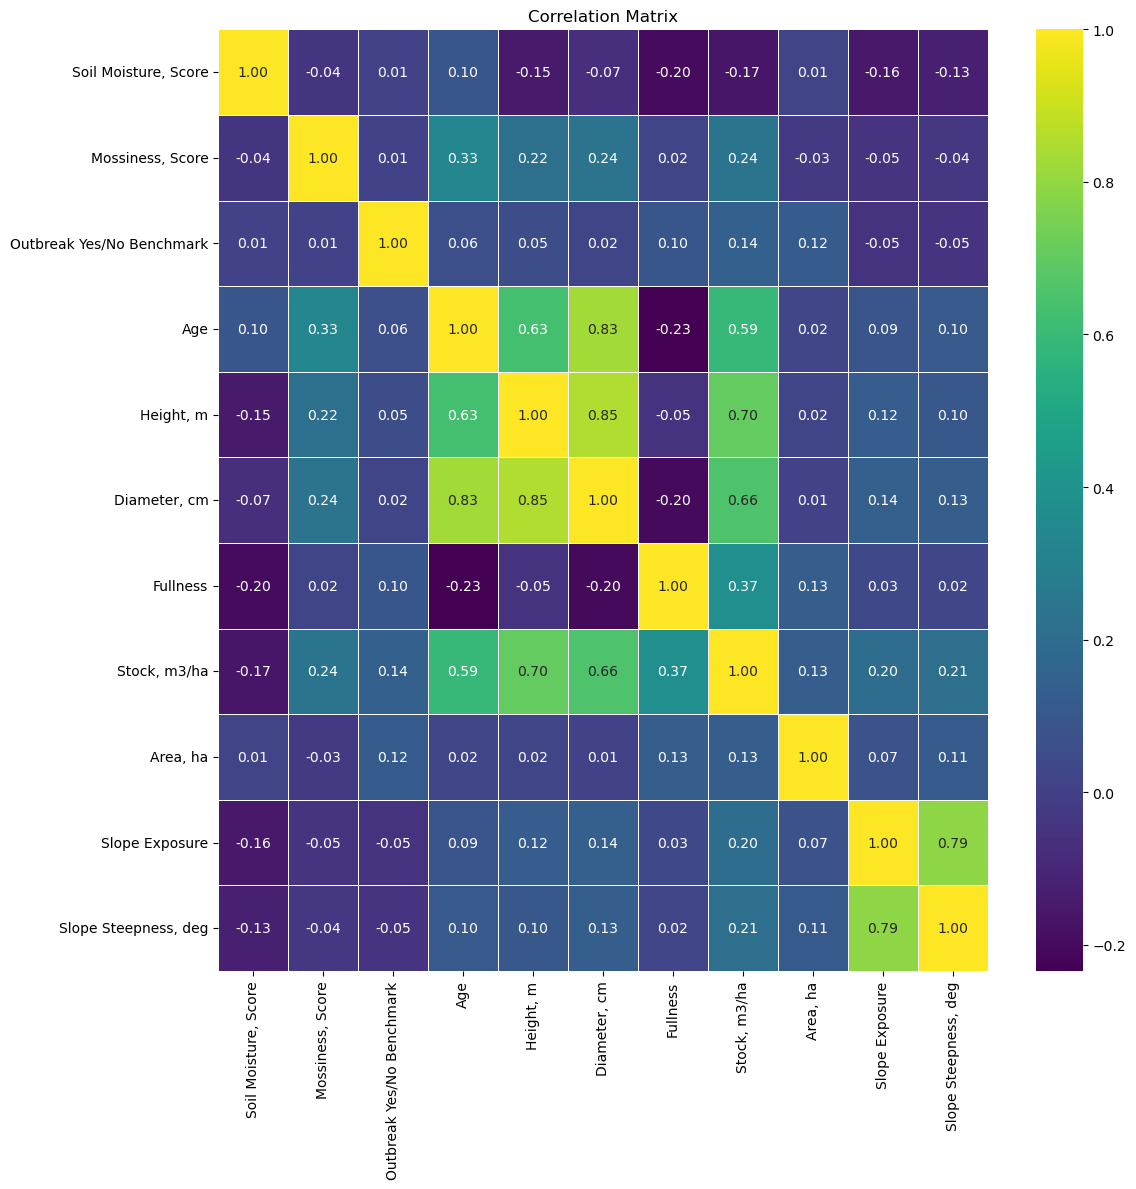

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем матрицу корреляции для выбранных признаков
corr_matrix = old_df__.corr()

# New labels
new_labels = [
    'Soil Moisture, Score', 'Mossiness, Score', 'Outbreak Yes/No Benchmark',
    'Age', 'Height, m', 'Diameter, cm', 'Fullness', 'Stock, m3/ha',
    'Area, ha', 'Slope Exposure', 'Slope Steepness, deg'
]

# Визуализируем матрицу корреляции с помощью seaborn
plt.figure(figsize=(12, 12))  # Adjust figure size as needed
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt=".2f", linewidths=.5,
            xticklabels=new_labels, yticklabels=new_labels)
plt.title('Correlation Matrix')
plt.tight_layout()  # Ensures labels are not cut off
plt.savefig('corr.pdf')
plt.show()


In [2]:
import pandas as pd

old_df = pd.read_excel('data.xlsx')

In [5]:
old_df[['П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС']]

,П,Е,Л,Б,ОС,К,С,ИВ,ИВК,ОЛС
0,3,1,3,2,1,0,0,0,0,0
1,5,0,0,0,1,4,0,0,0,0
2,2,4,1,2,0,1,0,0,0,0
3,2,4,1,2,0,1,0,0,0,0
4,2,3,1,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15429,1,0,0,5,1,1,2,0,0,0
15430,2,1,1,1,3,1,1,0,0,0
15431,2,1,1,1,3,1,1,0,0,0
15432,2,0,1,0,7,0,0,0,0,0


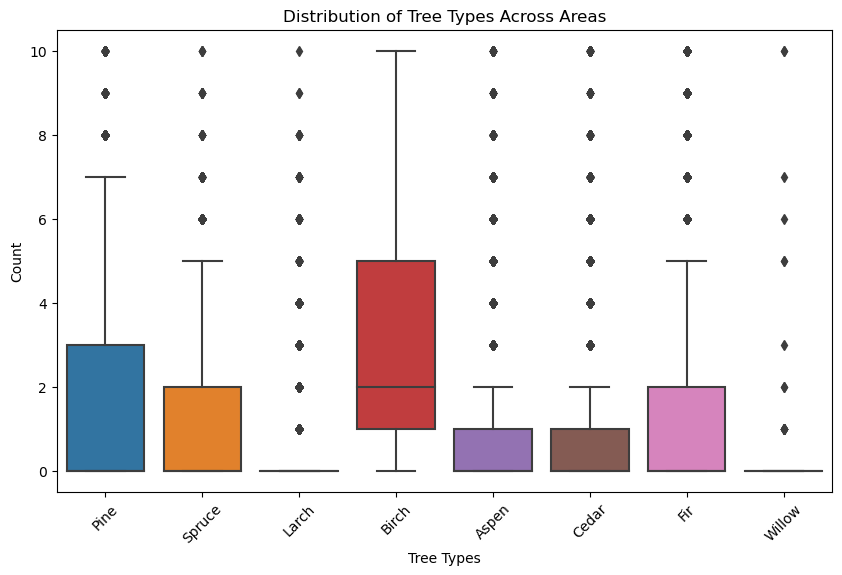

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataframe containing the columns
df = old_df[['П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С', 'ИВ']]#, 'ИВК', 'ОЛС']]

# List of tree species
tree_species = ['Pine', 'Spruce', 'Larch', 'Birch', 'Aspen', 'Cedar', 'Fir', 'Willow']#, 'Willow and Bird cherry', 'Alder and Small-leaf lime']

# Plotting boxplots for each column in one figure
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Distribution of Tree Types Across Areas')
plt.xlabel('Tree Types')
plt.ylabel('Count')
plt.xticks(range(len(tree_species)), tree_species, rotation=45)  # Rotate x-axis labels for better visibility
plt.show()




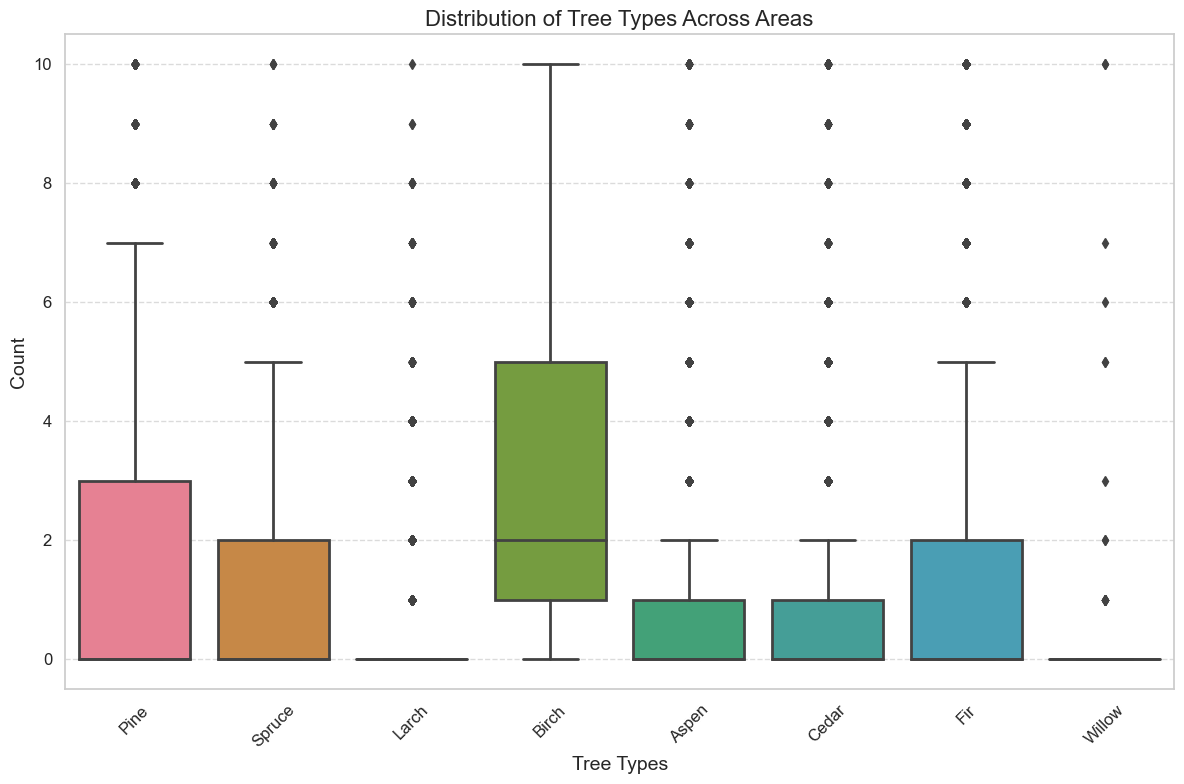

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataframe containing the columns
df = old_df[['П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С', 'ИВ']]#, 'ИВК', 'ОЛС']]

# List of tree species
tree_species = ['Pine', 'Spruce', 'Larch', 'Birch', 'Aspen', 'Cedar', 'Fir', 'Willow']#, 'Willow and Bird cherry', 'Alder and Small-leaf lime']

# Set custom color palette
custom_palette = sns.color_palette("husl", 10)

# Plotting boxplots for each column in one figure with custom style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df, palette=custom_palette, linewidth=2)
plt.title('Distribution of Tree Types Across Areas', fontsize=16)
plt.xlabel('Tree Types', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(tree_species)), tree_species, rotation=45, fontsize=12)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('whiskers.pdf')
plt.show()
